##                                                            EDA ON NER Training dataset 

In [1]:
#Importing dependencies for EDA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import itertools
import spacy
from spacy import displacy

#Importing the below block to display all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Reading the file
df = pd.read_csv("ner_datasetreference.csv", encoding='latin')
df.head()
df.shape

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


(1048575, 4)

In [3]:
# Column 1 represents sentences, Words represents each word in a sentence , POS is Parts of Speach tagging of individual words.
# Tag Represents the NER tag of each words
df = df.fillna(method='ffill')
df["Sentence #"] = df["Sentence #"].apply(lambda s: s[9:]).astype("int32")
df.head()

,Sentence #,Word,POS,Tag
0,1,Thousands,NNS,O
1,1,of,IN,O
2,1,demonstrators,NNS,O
3,1,have,VBP,O
4,1,marched,VBN,O


In [4]:
print("Total number of sentences in the dataset: {:,}".format(df["Sentence #"].nunique()))
print("Total words in the dataset: {:,}".format(df.shape[0]))

Total number of sentences in the dataset: 47,959
Total words in the dataset: 1,048,575


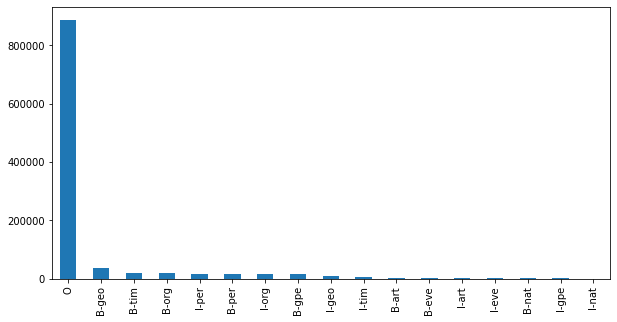

In [5]:
#Plotting the no of each tags
df["Tag"].value_counts().plot(kind="bar", figsize=(10,5)) 

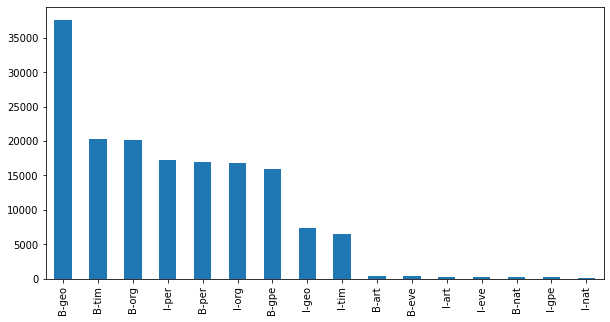

In [6]:
df[df["Tag"]!="O"]["Tag"].value_counts().plot(kind="bar", figsize=(10,5)) #Data has more O tags plotting without the O tags

In [7]:
df[df["Tag"]!="O"]["Tag"].value_counts()

B-geo    37644
B-tim    20333
B-org    20143
I-per    17251
B-per    16990
I-org    16784
B-gpe    15870
I-geo     7414
I-tim     6528
B-art      402
B-eve      308
I-art      297
I-eve      253
B-nat      201
I-gpe      198
I-nat       51
Name: Tag, dtype: int64

In [8]:
# Looking at the top 10 most used words
df.Word.value_counts()[:10]

the    52573
.      47761
,      32754
of     26354
in     26323
to     23213
a      20481
and    19936
The    11313
's     10923
Name: Word, dtype: int64

In [9]:
df[df["Sentence #"]==df.loc[841020]["Sentence #"]]

,Sentence #,Word,POS,Tag
841008,38444,Following,VBG,O
841009,38444,a,DT,O
841010,38444,briefing,NN,O
841011,38444,by,IN,O
841012,38444,the,DT,O
841013,38444,Energy,NNP,B-org
841014,38444,Department,NNP,I-org
841015,38444,",",",",O
841016,38444,the,DT,O
841017,38444,president,NN,O


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9654F4B08>]],
      dtype=object)

Text(0.5, 0, 'Bins of sentence with no of words')

Text(0, 0.5, 'No of words in sentences')

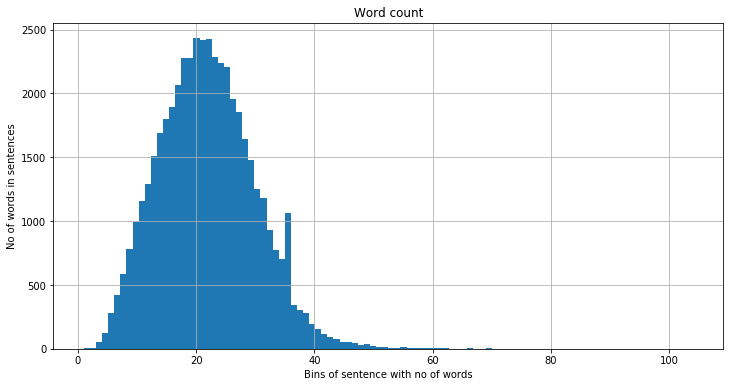

In [10]:
# Looking at the number of words in each sentence and plotting in a Histogram to look at the spread.
word_counts = df.groupby("Sentence #")["Word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
word_counts.hist(bins=100, figsize=(12,6))
plt.xlabel("Bins of sentence with no of words")
plt.ylabel("No of words in sentences")

In [11]:
MAX_SENTENCE = word_counts.max()[0]
MIN_SENTENCE = word_counts.min()[0]
print("Longest sentence in the corpus contains {} words.".format(MAX_SENTENCE))

Longest sentence in the corpus contains 104 words.


In [12]:
longest_sentence_id = word_counts[word_counts["Word count"]==MAX_SENTENCE].index[0]
print("ID of the longest sentence is {}.".format(longest_sentence_id))
shortest_sentence_id = word_counts[word_counts["Word count"]==MIN_SENTENCE].index[0]
print("ID of the Shortest sentence is {}.".format(shortest_sentence_id))

ID of the longest sentence is 22480.
ID of the Shortest sentence is 8412.


In [13]:
print("Longest Sentence :\n ", ' '.join(df[df["Sentence #"] == longest_sentence_id]["Word"]))
print("\nShortest Sentence :\n ", ' '.join(df[df["Sentence #"] == shortest_sentence_id]["Word"]))

Longest Sentence :
  Fisheries in 2006 - 7 landed 1,26,976 metric tons , of which 82 % ( 1,04,586 tons ) was krill ( Euphausia superba ) and 9.5 % ( 12,027 tons ) Patagonian toothfish ( Dissostichus eleginoides - also known as Chilean sea bass ) , compared to 1,27,910 tons in 2005 - 6 of which 83 % ( 1,06,591 tons ) was krill and 9.7 % ( 12,396 tons ) Patagonian toothfish ( estimated fishing from the area covered by the Convention of the Conservation of Antarctic Marine Living Resources ( CCAMLR ) , which extends slightly beyond the Southern Ocean area ) .

Shortest Sentence :
  The


In [14]:
#Exploring top twenty short sentences
for index, row in word_counts.sort_values('Word count', ascending=True).head(20).iterrows():
    print("Sentence : ", ' '.join(df[df["Sentence #"] == index]["Word"]))

Sentence :  The
Sentence :  ...
Sentence :  Janice Karpinski
Sentence :  Questions ?
Sentence :  John Garang
Sentence :  Bermet Akayeva
Sentence :  Thursday .
Sentence :  John Garang
Sentence :  Recep Tayyip Erdogan
Sentence :  George W. Bush
Sentence :  It was .
Sentence :  Fifteen dollars .
Sentence :  George W. Bush
Sentence :  Nina-Maria Potts reports .
Sentence :  Nnamdi Moweta reports .
Sentence :  He was 76 .
Sentence :  Ojedokun , Tuesday .
Sentence :  Jim Bertel narrates .
Sentence :  The NASA Missions .
Sentence :  Christmas was over .


In [15]:
# Creating a list of all unique words and unique tags
all_words = list(set(df["Word"].values))
all_tags = list(set(df["Tag"].values))
print("Number of unique words: {}".format(len(all_words)))
print("Number of unique tags : {}".format(len(all_tags)))

Number of unique words: 35178
Number of unique tags : 17


In [16]:
# Creating a dictionary of of unique words and assigning a unique index number similarly to NER tags as well 
word2index = {word: idx + 2 for idx, word in enumerate(all_words)}
word2index["UNKNOWN_WORD"]=0
word2index["PADDING"]= 1
tag2index = {tag: idx + 1 for idx, tag in enumerate(all_tags)}
tag2index["PADDING"] = 0
print(dict(list(word2index.items())[0:5])) ## Dislaying 5 samples
print(dict(list(tag2index.items())[0:5]))

{'476': 2, 'extraordinarily': 3, 'Faso': 4, 'Yao': 5, '516': 6}
{'B-geo': 1, 'B-eve': 2, 'I-org': 3, 'I-art': 4, 'I-gpe': 5}


In [17]:
len(word2index)
len(tag2index)

35180

18

In [18]:
#Creating a colum with unique indexes for words and NER tags
df['Word_Index'] = df['Word'].map(word2index)
df['Tag_index'] = df['Tag'].map(tag2index) 
df.head()

,Sentence #,Word,POS,Tag,Word_Index,Tag_index
0,1,Thousands,NNS,O,192,9
1,1,of,IN,O,4336,9
2,1,demonstrators,NNS,O,27759,9
3,1,have,VBP,O,21138,9
4,1,marched,VBN,O,3257,9


In [19]:
%%time
#Creating a Shorter df dataframe
grouped_df = df.groupby(['Sentence #'],as_index=False)['Word', 'POS', 'Tag', 'Word_Index', 'Tag_index'].agg(lambda x: list(x))
grouped_df.head()

C:\Users\mr081025\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Wall time: 1min 2s


,Sentence #,Word,POS,Tag,Word_Index,Tag_index
0,1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[192, 4336, 27759, 21138, 3257, 18451, 1119, 2...","[9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, ..."
1,2,"[Families, of, soldiers, killed, in, the, conf...","[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[15407, 4336, 27216, 6633, 20547, 8235, 10784,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
2,3,"[They, marched, from, the, Houses, of, Parliam...","[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo...","[25213, 3257, 14414, 8235, 34357, 4336, 22651,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 8, 9]"
3,4,"[Police, put, the, number, of, marchers, at, 1...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[3226, 26397, 8235, 30948, 4336, 34033, 11987,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]"
4,5,"[The, protest, comes, on, the, eve, of, the, a...","[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...","[7125, 9548, 28792, 28119, 8235, 12662, 4336, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 13,..."


In [20]:
#Number of sentences in the dataset
grouped_df.shape

(47959, 6)

In [21]:
# Looking at the percentage of sentence which as more than 40 words
print("The percentage of sentences which has more than 40 words is : ", round(word_counts[word_counts["Word count"] > 40].shape[0] / len(word_counts["Word count"]) * 100, 2),"%")

The percentage of sentences which has more than 40 words is :  1.61 %


In [22]:
#Padding the sentence for only 40 max length for each sentence for NLP modeling
grouped_df["Padded_Word_Index"] = grouped_df["Word_Index"].apply(lambda x: x + [word2index["PADDING"]] * (40 - len(x)) if (len(x) <=40) else x[:40])
grouped_df["Padded_Tag_Index"] = grouped_df["Tag_index"].apply(lambda x: x + [tag2index["PADDING"]] * (40 - len(x)) if (len(x) <=40) else x[:40])

In [23]:
grouped_df.head()

,Sentence #,Word,POS,Tag,Word_Index,Tag_index,Padded_Word_Index,Padded_Tag_Index
0,1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[192, 4336, 27759, 21138, 3257, 18451, 1119, 2...","[9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, ...","[192, 4336, 27759, 21138, 3257, 18451, 1119, 2...","[9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, ..."
1,2,"[Families, of, soldiers, killed, in, the, conf...","[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[15407, 4336, 27216, 6633, 20547, 8235, 10784,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[15407, 4336, 27216, 6633, 20547, 8235, 10784,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
2,3,"[They, marched, from, the, Houses, of, Parliam...","[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo...","[25213, 3257, 14414, 8235, 34357, 4336, 22651,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 8, 9]","[25213, 3257, 14414, 8235, 34357, 4336, 22651,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 8, 9, 0, ..."
3,4,"[Police, put, the, number, of, marchers, at, 1...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[3226, 26397, 8235, 30948, 4336, 34033, 11987,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[3226, 26397, 8235, 30948, 4336, 34033, 11987,...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
4,5,"[The, protest, comes, on, the, eve, of, the, a...","[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...","[7125, 9548, 28792, 28119, 8235, 12662, 4336, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 13,...","[7125, 9548, 28792, 28119, 8235, 12662, 4336, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 13,..."


In [24]:
# Looking at the first sentence to double check if the words, tags are saved and padded properly.
print(grouped_df.iloc[0,1])
print(grouped_df.iloc[0,3])
print(grouped_df.iloc[0,4])
print(len(grouped_df.iloc[0,4]))
print(grouped_df.iloc[0,5])
print(len(grouped_df.iloc[0,5]))
print(grouped_df.iloc[0,6])
print(len(grouped_df.iloc[0,6]))
print(grouped_df.iloc[0,7])
print(len(grouped_df.iloc[0,7]))

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']
[192, 4336, 27759, 21138, 3257, 18451, 1119, 25156, 9548, 8235, 32980, 20547, 3471, 18585, 8717, 8235, 22042, 4336, 13671, 34509, 14414, 26653, 27408, 21542]
24
[9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 12, 9, 9, 9, 9, 9]
24
[192, 4336, 27759, 21138, 3257, 18451, 1119, 25156, 9548, 8235, 32980, 20547, 3471, 18585, 8717, 8235, 22042, 4336, 13671, 34509, 14414, 26653, 27408, 21542, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40
[9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 12, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40


In [25]:
# Saving this df for different model training
grouped_df.to_csv("Ner_ModelReady_data.csv", index=False)

In [26]:
#Saving the Word2Index as Json file
import json

with open('word2index.json', 'w') as fp:
    json.dump(word2index, fp)

with open('tag2index.json', 'w') as fp:
    json.dump(tag2index, fp)

##  ------BiLSTM - Model--------

In [27]:
#Converting the input and target values into list of list.
X = [i for i in grouped_df["Padded_Word_Index"]]
y = [i for i in grouped_df["Padded_Tag_Index"]]

In [28]:
# One hot encoding the target variable as each word has 18 different possibilities
from tensorflow.keras.utils import to_categorical 
y = [to_categorical(i, num_classes=len(tag2index)) for i in y]

In [29]:
# Looking at the first index for the tags.
for token, tag in zip(X[0], y[0]):
    print('%s\t%s' % (token, tag))

192	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4336	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
27759	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
21138	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3257	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
18451	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1119	[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
25156	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9548	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
8235	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
32980	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
20547	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3471	[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18585	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
8717	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
8235	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
22042	[0. 0. 0. 0.

In [30]:
#Spliting the data to train test split using 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
#conveting the data into array to feed data into model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
#Importing Model dependencies from tensorflow
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [33]:
#Specifying fixed hyper parameters
sentence_length = 40 # Number of words in a sentne ce passed as input to the model
total_unique_words = len(word2index)

In [36]:
from kerastuner.tuners import RandomSearch
import kerastuner
from tensorflow.keras.optimizers import Adam
import tensorflow


def build_model(hp):
    model = Sequential()
    hp_units = hp.Int('out_dim', min_value=20, max_value=60, step=20)
    model.add(Embedding(input_dim=total_unique_words, output_dim=hp_units ,input_length=sentence_length))
    model.add(SpatialDropout1D(0.1))
    
    hp_units = hp.Int('units', min_value=50, max_value=100, step=25)
    model.add(Bidirectional(LSTM(units=hp_units, return_sequences=True, recurrent_dropout=0.1)))
    
    model.add(TimeDistributed(Dense(18, activation='softmax')))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective=kerastuner.Objective('val_loss', direction="min"),
    max_trials=10,
    executions_per_trial=1,
    directory='BiLSTM_First',
    project_name='BiLSTM_asis')

tuner.search_space_summary()

Search space summary
Default search space size: 3
out_dim (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 60, 'step': 20, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 25, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [37]:
#Searching for best hyper parameter by randomly selecting 10 different combinations
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) 
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early])

Trial 10 Complete [00h 08m 03s]
val_loss: 0.05539344996213913

Best val_loss So Far: 0.05539344996213913
Total elapsed time: 01h 31m 41s
INFO:tensorflow:Oracle triggered exit


In [38]:
#Looking at the summary to get the best judge of hyper paramaters used and the validation loss for each
tuner.results_summary()

Results summary
Results in BiLSTM_First\BiLSTM_asis
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
out_dim: 60
units: 75
learning_rate: 0.01
Score: 0.05539344996213913
Trial summary
Hyperparameters:
out_dim: 40
units: 100
learning_rate: 0.001
Score: 0.05650981888175011
Trial summary
Hyperparameters:
out_dim: 60
units: 50
learning_rate: 0.001
Score: 0.05696422979235649
Trial summary
Hyperparameters:
out_dim: 40
units: 50
learning_rate: 0.001
Score: 0.05697307363152504
Trial summary
Hyperparameters:
out_dim: 20
units: 75
learning_rate: 0.001
Score: 0.057631079107522964
Trial summary
Hyperparameters:
out_dim: 40
units: 75
learning_rate: 0.001
Score: 0.058453213423490524
Trial summary
Hyperparameters:
out_dim: 20
units: 100
learning_rate: 0.001
Score: 0.05867709964513779
Trial summary
Hyperparameters:
out_dim: 60
units: 50
learning_rate: 0.0001
Score: 0.10816957801580429
Trial summary
Hyperparameters:
out_dim: 40
units: 75
learning_rate: 0

In [39]:
#printing the best hyper parameters as per the tuner.
best_hps=tuner.get_best_hyperparameters()[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of neurons for BiLSTM layer is {best_hps.get('units')},
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')} and
The No of dimentions of the Embedding o/p is {best_hps.get('out_dim')}.
""")


The hyperparameter search is complete. 
The optimal number of neurons for BiLSTM layer is 75,
The optimal learning rate for the optimizer is 0.01 and
The No of dimentions of the Embedding o/p is 60.



In [40]:
# Build the model with the optimal hyperparameters and train it on the data for 10 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
#checking which Epoch had the lowest val_loss
val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1199/1199 [==============================] - 133s 104ms/step - loss: 0.0972 - accuracy: 0.9727 - val_loss: 0.0557 - val_accuracy: 0.9830
Epoch 2/10
1199/1199 [==============================] - 126s 105ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0557 - val_accuracy: 0.9833
Epoch 3/10
1199/1199 [==============================] - 131s 109ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0575 - val_accuracy: 0.9832
Epoch 4/10
1199/1199 [==============================] - 130s 108ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0612 - val_accuracy: 0.9831
Epoch 5/10
1199/1199 [==============================] - 129s 108ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0633 - val_accuracy: 0.9828
Epoch 6/10
1199/1199 [==============================] - 128s 107ms/step - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.0669 - val_accuracy: 0.9819
Epoch 7/10
1199/1199 [==============================] - 135s 113ms/step - loss: 0.0265 - accuracy: 0.9910 - val_

<Figure size 864x576 with 0 Axes>

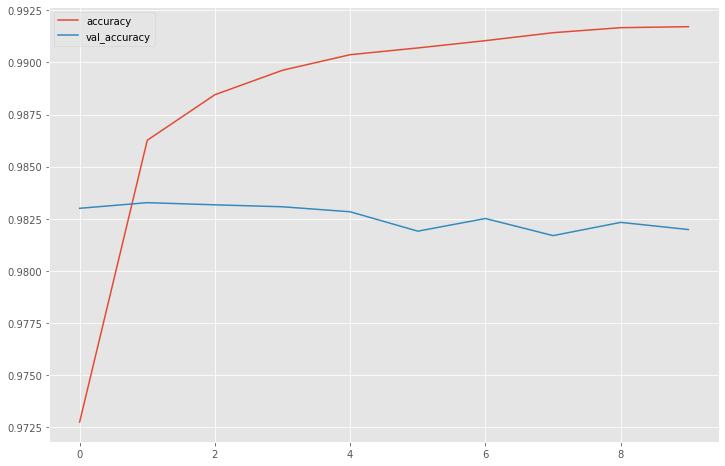

In [41]:
#Plotting Accuracy vs Validation accuracy
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
plt.plot(hist["accuracy"],  label ='accuracy')
plt.plot(hist["val_accuracy"], label ='val_accuracy')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

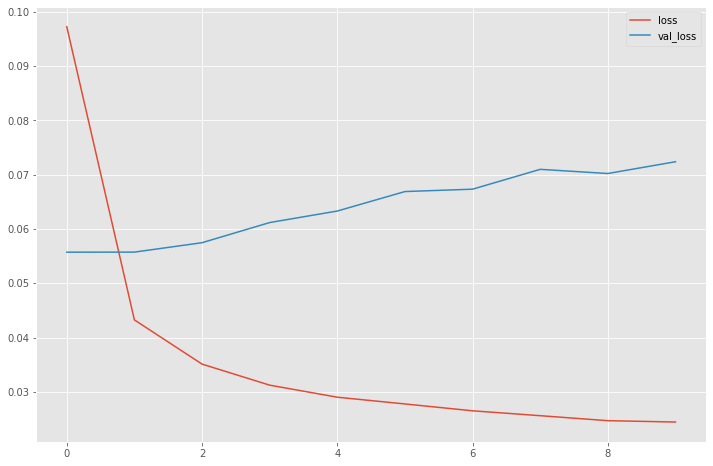

In [42]:
#Plotting Loss vs Validation loss
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
plt.plot(hist["loss"],  label ='loss')
plt.plot(hist["val_loss"], label ='val_loss')
plt.legend()
plt.show()

In [43]:
#Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
stop_early_final = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True) 
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early_final])

Epoch 1/5
1199/1199 [==============================] - 136s 107ms/step - loss: 0.1031 - accuracy: 0.9721 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 2/5
1199/1199 [==============================] - 227s 190ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 3/5
1199/1199 [==============================] - 235s 196ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0581 - val_accuracy: 0.9830
Epoch 4/5
1199/1199 [==============================] - 231s 192ms/step - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0613 - val_accuracy: 0.9826


In [44]:
#Self model 1 with params = output_dim = 40, units=75 and learning_rate=0.01
custom_model_1 = Sequential()
custom_model_1.add(Embedding(input_dim=total_unique_words, output_dim=40 ,input_length=sentence_length))
custom_model_1.add(SpatialDropout1D(0.1))
custom_model_1.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))    
custom_model_1.add(TimeDistributed(Dense(18, activation='softmax')))
custom_model_1.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
custom_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 40)            1407200   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 40, 40)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 40, 200)          112800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 40, 18)           3618      
 tributed)                                                       
                                                                 
Total params: 1,523,618
Trainable params: 1,523,618
Non-trainable params: 0
____________________________________________

In [45]:
#Looking at the results of custom model 1
custom_model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early_final])

Epoch 1/5
1199/1199 [==============================] - 256s 207ms/step - loss: 0.1059 - accuracy: 0.9709 - val_loss: 0.0576 - val_accuracy: 0.9826
Epoch 2/5
1199/1199 [==============================] - 243s 202ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0549 - val_accuracy: 0.9834
Epoch 3/5
1199/1199 [==============================] - 252s 210ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.0582 - val_accuracy: 0.9831
Epoch 4/5
1199/1199 [==============================] - 255s 213ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0610 - val_accuracy: 0.9822


In [46]:
#Self model 1 with params = output_dim = 20, units=50 and learning_rate=0.01
custom_model_2 = Sequential()
custom_model_2.add(Embedding(input_dim=total_unique_words, output_dim=20 ,input_length=sentence_length))
custom_model_2.add(SpatialDropout1D(0.1))
custom_model_2.add(Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1)))    
custom_model_2.add(TimeDistributed(Dense(18, activation='softmax')))
custom_model_2.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
custom_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 20)            703600    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 40, 20)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_4 (Bidirectio  (None, 40, 100)          28400     
 nal)                                                            
                                                                 
 time_distributed_4 (TimeDis  (None, 40, 18)           1818      
 tributed)                                                       
                                                                 
Total params: 733,818
Trainable params: 733,818
Non-trainable params: 0
________________________________________________

In [47]:
#Looking at the results of custom model 2
custom_model_2.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early_final])

Epoch 1/5
1199/1199 [==============================] - 96s 74ms/step - loss: 0.1182 - accuracy: 0.9684 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 2/5
1199/1199 [==============================] - 88s 74ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 3/5
1199/1199 [==============================] - 86s 71ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 4/5
1199/1199 [==============================] - 86s 72ms/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.0573 - val_accuracy: 0.9829


In [48]:
#Replacing the tag indexes with tags and predicting on test data
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

hypermodel_pred = hypermodel.predict(X_test, verbose=1)
custom_model_1_pred = custom_model_1.predict(X_test, verbose=1)
custom_model_2_pred = custom_model_2.predict(X_test, verbose=1)

idx2tag = {i: w for w, i in tag2index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADDING", "O"))
        out.append(out_i)
    return out
    
hypermodel_pred_labels = pred2label(hypermodel_pred)
custom_model_1_labels = pred2label(custom_model_1_pred)
custom_model_2_labels = pred2label(custom_model_2_pred)
test_labels = pred2label(y_test)

300/300 [==============================] - 4s 11ms/step


In [49]:
#Checking for weighted f1 score and classification report
print("Hyper Parameter Tuned model F1-score: {:.1%}".format(f1_score(test_labels, hypermodel_pred_labels)))
print("Custom Parameters model 1 F1-score: {:.1%}".format(f1_score(test_labels, custom_model_1_labels)))
print("Custom Parameters model 2 F1-score: {:.1%}".format(f1_score(test_labels, custom_model_2_labels)))

Hyper Parameter Tuned model F1-score: 81.8%
Custom Parameters model 1 F1-score: 81.7%
Custom Parameters model 2 F1-score: 81.7%


In [50]:
print("Classification Report of Hyper paramater tuned model")
print(classification_report(test_labels, hypermodel_pred_labels))
print("Classification Report of Custom model 1")
print(classification_report(test_labels, custom_model_1_labels))
print("Classification Report of Custom model 2")
print(classification_report(test_labels, custom_model_2_labels))

Classification Report of Hyper paramater tuned model
              precision    recall  f1-score   support

         art       0.35      0.10      0.15        62
         eve       0.60      0.20      0.30        59
         geo       0.82      0.91      0.86      7529
         gpe       0.96      0.93      0.95      3196
         nat       0.70      0.17      0.27        42
         org       0.71      0.65      0.68      3982
         per       0.75      0.73      0.74      3356
         tim       0.87      0.83      0.85      4036

   micro avg       0.82      0.82      0.82     22262
   macro avg       0.72      0.56      0.60     22262
weighted avg       0.82      0.82      0.82     22262

Classification Report of Custom model 1
              precision    recall  f1-score   support

         art       0.54      0.11      0.19        62
         eve       0.62      0.17      0.27        59
         geo       0.84      0.90      0.87      7529
         gpe       0.95      0.94      

In [51]:
#Predictin on Test dataset
def get_key(val,diction):
    for key, value in diction.items():
        if val == value:
            return key

i = np.random.randint(0, X_test.shape[0])

h_p = hypermodel.predict(np.array([X_test[i]]))
c1_p = custom_model_1.predict(np.array([X_test[i]]))
c2_p = custom_model_2.predict(np.array([X_test[i]]))

h_p = np.argmax(h_p, axis=-1)
c1_p = np.argmax(c1_p, axis=-1)
c2_p = np.argmax(c2_p, axis=-1)

y_true = np.argmax(np.array(y_test), axis=-1)[i]

print("{:15}{:10}{:10}{:10}{:10}".format("Word", "True", "HM_Pred","C1_Pred","C2_Pred"))
print("-"*50)

for (w, t, h_p,c1_p,c2_p) in zip(X_test[i], y_true, h_p[0], c1_p[0],c2_p[0]):
    if get_key(w,word2index) == 'PADDING':
        pass
    else:
        print("{:15}{:10}{:10}{:10}{:10}".format(get_key(w,word2index), get_key(t,tag2index), get_key(h_p,tag2index), get_key(c1_p,tag2index), get_key(c2_p,tag2index)))

Word           True      HM_Pred   C1_Pred   C2_Pred   
--------------------------------------------------
The            O         O         O         O         
Guantanamo     B-geo     B-geo     B-geo     B-geo     
facility       O         O         O         O         
holds          O         O         O         O         
at             O         O         O         O         
least          O         O         O         O         
275            O         O         O         O         
terror         O         O         O         O         
suspects       O         O         O         O         
captured       O         O         O         O         
in             O         O         O         O         
Afghanistan    B-geo     B-geo     B-geo     B-geo     
and            O         O         O         O         
elsewhere      O         O         O         O         
.              O         O         O         O         


In [54]:
# Training model on complete dataset 
# With Hyper parameters 
# output_dim = 40, units=100 and learning_rate=0.01

Final_model = Sequential()
Final_model.add(Embedding(input_dim=total_unique_words, output_dim=60 ,input_length=sentence_length))
Final_model.add(SpatialDropout1D(0.1))
Final_model.add(Bidirectional(LSTM(units=75, return_sequences=True, recurrent_dropout=0.1)))    
Final_model.add(TimeDistributed(Dense(18, activation='softmax')))

Final_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
Final_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 60)            2110800   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 40, 60)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_6 (Bidirectio  (None, 40, 150)          81600     
 nal)                                                            
                                                                 
 time_distributed_6 (TimeDis  (None, 40, 18)           2718      
 tributed)                                                       
                                                                 
Total params: 2,195,118
Trainable params: 2,195,118
Non-trainable params: 0
____________________________________________

In [55]:
#Fitting final model for two epochs as all test training was overfitting for more number of epochs
Full_X_Train = np.array(X)
Full_Y_Train = np.array(y)
Final_model.fit(Full_X_Train, Full_Y_Train, epochs=2)

Epoch 1/2
1499/1499 [==============================] - 180s 115ms/step - loss: 0.0909 - accuracy: 0.9748
Epoch 2/2
1499/1499 [==============================] - 173s 116ms/step - loss: 0.0427 - accuracy: 0.9863


In [66]:
#saving the model
Final_model.save('TrainedModels/BiLSTM_Final_model.h5')

#### Predicting on Climate change dataset

In [57]:
#Readig the cleaned dataset
ClimateChange_DF = pd.read_csv("Cleaned_English_tweets.csv")
#keeping only the tweets
ClimateChange_DF = ClimateChange_DF[["CleanedTweets"]]
ClimateChange_DF.head()
ClimateChange_DF.shape

,CleanedTweets
0,News Trends Data Americans are less concerned ...
1,Do you realize that civil war is the devastati...
2,Having anxiety over the weather something they...
3,In the last few years I've noticed that studen...
4,FULL INTERVIEW BTS ARMY BTSonGMA NEWS EXCLUSIV...


(1557690, 1)

In [58]:
# Creating a list of word index with padding
ClimateChange_DF["Word"] = ClimateChange_DF["CleanedTweets"].apply(lambda x: str(x).lower().split())
ClimateChange_DF['Word_Index'] = ClimateChange_DF['Word'].apply(lambda x: [word2index[s] if s in word2index else word2index['UNKNOWN_WORD'] for s in x])
ClimateChange_DF["Padded_Word_Index"] = ClimateChange_DF["Word_Index"].apply(lambda x: x + [word2index["PADDING"]] * (40 - len(x)) if (len(x) <=40) else x[:40])

In [59]:
ClimateChange_DF.head()

,CleanedTweets,Word,Word_Index,Padded_Word_Index
0,News Trends Data Americans are less concerned ...,"[news, trends, data, americans, are, less, con...","[31737, 20337, 21177, 0, 23216, 10517, 25944, ...","[31737, 20337, 21177, 0, 23216, 10517, 25944, ..."
1,Do you realize that civil war is the devastati...,"[do, you, realize, that, civil, war, is, the, ...","[21405, 14666, 20342, 26653, 2796, 32980, 6563...","[21405, 14666, 20342, 26653, 2796, 32980, 6563..."
2,Having anxiety over the weather something they...,"[having, anxiety, over, the, weather, somethin...","[27689, 19769, 29935, 8235, 21182, 2958, 35049...","[27689, 19769, 29935, 8235, 21182, 2958, 35049..."
3,In the last few years I've noticed that studen...,"[in, the, last, few, years, i've, noticed, tha...","[20547, 8235, 8856, 29571, 31255, 0, 12021, 26...","[20547, 8235, 8856, 29571, 31255, 0, 12021, 26..."
4,FULL INTERVIEW BTS ARMY BTSonGMA NEWS EXCLUSIV...,"[full, interview, bts, army, btsongma, news, e...","[26805, 25014, 0, 35064, 0, 31737, 23664, 3032...","[26805, 25014, 0, 35064, 0, 31737, 23664, 3032..."


In [65]:
#Predictin on Test dataset
def get_key(val,diction):
    for key, value in diction.items():
        if val == value:
            return key

i = np.random.randint(0, ClimateChange_DF.Padded_Word_Index.shape[0])

h_p = Final_model_Strict_Clean.predict(np.array([ClimateChange_DF.Padded_Word_Index[i]]))

h_p = np.argmax(h_p, axis=-1)

print("{:20}{:20}{:10}".format("Actual Word", "Word", "True",))
print("-"*30)
for (m, w, t) in itertools.zip_longest(ClimateChange_DF.Word[i][:40], ClimateChange_DF.Padded_Word_Index[i], h_p[0]):
    if get_key(w,word2index) == 'PADDING':
        pass
    else:
        print("{:20}{:20}{:10}".format(str(m), get_key(w,word2index), get_key(t,tag2index)))

#Using Spacy to cross check for entities
nlp = spacy.load('en_core_web_sm')
text = nlp(ClimateChange_DF.CleanedTweets[i])
displacy.render(text, style = 'ent', jupyter=True)

Actual Word         Word                True      
------------------------------
ive                 UNKNOWN_WORD        O         
dedicated           dedicated           O         
the                 the                 O         
past                past                B-tim     
2                   2                   I-tim     
years               years               O         
to                  to                  O         
exposing            exposing            O         
the                 the                 O         
money               money               O         
behind              behind              O         
the                 the                 O         
conference          conference          O         
of                  of                  O         
the                 the                 O         
parties             parties             O         
the                 the                 O         
most                most                O         


In [ ]:
#For testing import the model and the index
from tensorflow import keras
LoadedModel = keras.models.load_model('TrainedModels/Final_model_Strict_Clean')

#Reading the dictionaries back 
with open('word2index', 'r') as fp:
    word2index = json.load(fp)
    
with open('word2index', 'r') as fp:
    tag2index = json.load(fp)